In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 1024.", name="epoch 50")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=50, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 1,077,273
Trainable params: 1,077,273
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
4/5 [=======================>......] - ETA: 0s - loss: 1.4751 - mae: 0.9821INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 657ms/step - loss: 1.4095 - mae: 0.9567 - val_loss: 0.5560 - val_mae: 0.6120
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.6085 - mae: 0.6234INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 538ms/step - loss: 0.6085 - mae: 0.6234 - val_loss: 0.3288 - val_mae: 0.4675
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.3308 - mae: 0.4610INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.3308 - mae: 0.4610 - val_loss: 0.2152 - val_mae: 0.3835
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.2522 - mae: 0.4053INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 583ms/step - loss: 0.2522 - mae: 0.4053 - val_loss: 0.2024 - val_mae: 0.3714
Epoch 5/50
5/5 [==============================] - 1s 163ms/step - loss: 0.2185 - mae: 0.3851 - val_loss: 0.2330 - val_mae: 0.3990
Epoch 6/50
5/5 [==============================] - 1s 165ms/step - loss: 0.1946 - mae: 0.3639 - val_loss: 0.2211 - val_mae: 0.3839
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.2160 - mae: 0.3797INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 521ms/step - loss: 0.2160 - mae: 0.3797 - val_loss: 0.2020 - val_mae: 0.3697
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.2019 - mae: 0.3711INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 518ms/step - loss: 0.2019 - mae: 0.3711 - val_loss: 0.1952 - val_mae: 0.3631
Epoch 9/50
5/5 [==============================] - 1s 170ms/step - loss: 0.1904 - mae: 0.3604 - val_loss: 0.2564 - val_mae: 0.4164
Epoch 10/50
5/5 [==============================] - 1s 144ms/step - loss: 0.2316 - mae: 0.3913 - val_loss: 0.1956 - val_mae: 0.3630
Epoch 11/50
5/5 [==============================] - 1s 150ms/step - loss: 0.2080 - mae: 0.3754 - val_loss: 0.1973 - val_mae: 0.3664
Epoch 12/50
4/5 [=======================>......] - ETA: 0s - loss: 0.2086 - mae: 0.3778INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 524ms/step - loss: 0.2053 - mae: 0.3742 - val_loss: 0.1941 - val_mae: 0.3661
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.1904 - mae: 0.3608INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 516ms/step - loss: 0.1904 - mae: 0.3608 - val_loss: 0.1837 - val_mae: 0.3553
Epoch 14/50
5/5 [==============================] - 1s 177ms/step - loss: 0.1838 - mae: 0.3545 - val_loss: 0.2061 - val_mae: 0.3763
Epoch 15/50
5/5 [==============================] - 1s 162ms/step - loss: 0.2075 - mae: 0.3721 - val_loss: 0.2190 - val_mae: 0.3827
Epoch 16/50
5/5 [==============================] - 1s 157ms/step - loss: 0.2051 - mae: 0.3715 - val_loss: 0.1934 - val_mae: 0.3665
Epoch 17/50
5/5 [==============================] - 1s 154ms/step - loss: 0.2006 - mae: 0.3712 - val_loss: 0.1885 - val_mae: 0.3591
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.1888 - mae: 0.3591INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 500ms/step - loss: 0.1888 - mae: 0.3591 - val_loss: 0.1829 - val_mae: 0.3534
Epoch 19/50
4/5 [=======================>......] - ETA: 0s - loss: 0.1804 - mae: 0.3505INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 551ms/step - loss: 0.1873 - mae: 0.3563 - val_loss: 0.1821 - val_mae: 0.3564
Epoch 20/50
5/5 [==============================] - 1s 192ms/step - loss: 0.1821 - mae: 0.3528 - val_loss: 0.1884 - val_mae: 0.3585
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.1870 - mae: 0.3549INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 506ms/step - loss: 0.1870 - mae: 0.3549 - val_loss: 0.1810 - val_mae: 0.3522
Epoch 22/50
5/5 [==============================] - ETA: 0s - loss: 0.1809 - mae: 0.3512INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 547ms/step - loss: 0.1809 - mae: 0.3512 - val_loss: 0.1769 - val_mae: 0.3528
Epoch 23/50
5/5 [==============================] - 1s 160ms/step - loss: 0.1791 - mae: 0.3480 - val_loss: 0.1795 - val_mae: 0.3520
Epoch 24/50
5/5 [==============================] - ETA: 0s - loss: 0.1801 - mae: 0.3519INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 530ms/step - loss: 0.1801 - mae: 0.3519 - val_loss: 0.1706 - val_mae: 0.3428
Epoch 25/50
5/5 [==============================] - 1s 187ms/step - loss: 0.1823 - mae: 0.3526 - val_loss: 0.1983 - val_mae: 0.3706
Epoch 26/50
5/5 [==============================] - 1s 151ms/step - loss: 0.1912 - mae: 0.3587 - val_loss: 0.1831 - val_mae: 0.3515
Epoch 27/50
5/5 [==============================] - 1s 156ms/step - loss: 0.1921 - mae: 0.3618 - val_loss: 0.2103 - val_mae: 0.3762
Epoch 28/50
5/5 [==============================] - 1s 155ms/step - loss: 0.2119 - mae: 0.3777 - val_loss: 0.1885 - val_mae: 0.3611
Epoch 29/50
5/5 [==============================] - 1s 155ms/step - loss: 0.2111 - mae: 0.3793 - val_loss: 0.1968 - val_mae: 0.3663
Epoch 30/50
5/5 [==============================] - 1s 155ms/step - loss: 0.1962 - mae: 0.3659 - val_loss: 0.1878 - val_mae: 0.3591
Epoch 31/50
5/5 [==============================] - 1s 153ms/step - loss: 0.1881 - mae: 0.3571 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203047-2kpbyk3e\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 510ms/step - loss: 0.1788 - mae: 0.3456 - val_loss: 0.1633 - val_mae: 0.3345
Epoch 48/50
5/5 [==============================] - 1s 166ms/step - loss: 0.1654 - mae: 0.3352 - val_loss: 0.1974 - val_mae: 0.3652
Epoch 49/50
5/5 [==============================] - 1s 154ms/step - loss: 0.1847 - mae: 0.3524 - val_loss: 0.2328 - val_mae: 0.3956
Epoch 50/50
5/5 [==============================] - 1s 159ms/step - loss: 0.2139 - mae: 0.3816 - val_loss: 0.1965 - val_mae: 0.3649


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 90ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.2247845, 1.5154438, 1.3221676, 1.274992 , 1.1685416, 1.4295312,
        1.2377837, 1.1863742, 1.4778742, 1.260326 , 1.3374432, 1.575541 ,
        1.5100766, 1.4245263, 1.16388  , 1.4151987, 1.3442513, 1.4745604,
        1.5846196, 1.1529205, 1.5972168, 1.3592833, 1.5537894, 1.7753868,
        1.6244694]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

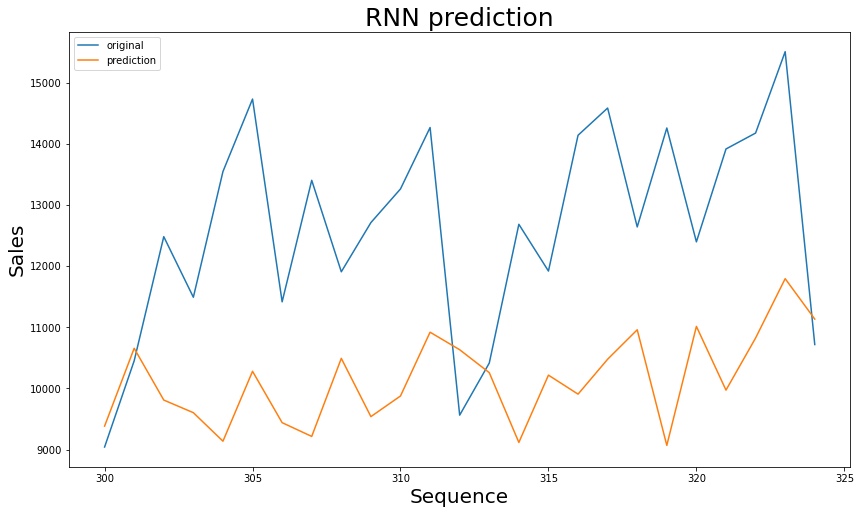

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 26ms/step - loss: 0.4803 - mae: 0.6025


[0.4803449213504791, 0.6025326251983643]